In [1]:
# Creating Statistical parsing tree using CFG

import nltk
from nltk import CFG

grammar = CFG.fromstring("""
    S -> NP VP
    NP -> Det N
    VP -> V
    Det -> 'The'
    N -> 'cat'
    V -> 'sleeps'
""")

parser = nltk.ChartParser(grammar)

sentence = ["The", "cat", "sleeps"]

for tree in parser.parse(sentence):
    tree.pretty_print()

         S        
      ___|____     
     NP       VP  
  ___|___     |    
Det      N    V   
 |       |    |    
The     cat sleeps



In [2]:
# Now PCFG with probabilities

from nltk import PCFG

grammar = PCFG.fromstring("""
    S -> NP VP [1.0]
    NP -> Det N [0.9] | Name [0.1]
    VP -> V [0.5] | V NP [0.5]
    Det -> 'The' [1.0]
    N -> 'cat' [0.5] | 'dog' [0.5]
    V -> 'sleeps' [0.5] | 'barks' [0.5]
    Name -> 'John' [1.0]
""")

parser = nltk.ViterbiParser(grammar)

sentence = ["The", "cat", "sleeps"]

for tree in parser.parse(sentence):
    tree.pretty_print()

         S        
      ___|____     
     NP       VP  
  ___|___     |    
Det      N    V   
 |       |    |    
The     cat sleeps



In [3]:
# Text cataforization: Patttern based using re

import re

rules  = {

    'business': r'\b(company|market|stock|profit|revenue|economy)\b',

    'education': r'\b(school student|university|curriculum|exam)\b',

    'entertainment': r'\b(movie|music|film|actor|show|drama)\b',

    'sports': r'\b(game|match|team|tournament|score|goal)\b',

    'technology': r'\b(technology|AI|software|computer|gadget|device)\b'
}

def rule_based_predict(text):

    for category, pattern in rules.items():

        if re.search(pattern, text.lower()):

            return category

    return 'unknown'

new_descriptions = [

    "The company reported a significant increase in quarterly profits.",

    "A new curriculum will be introduced in all state schools.",

    "The latest movie release has broken all box office records.",

    "The football team secured a last-minute victory in the finals.",

    "Innovations in AI are changing the face of the tech industry."
]


print("Rule-based prediction for new news stories : ")

for desc in new_descriptions:

    pred = rule_based_predict(desc)

    print(f"Description: {desc}")

    print(f"Predicted Category: {pred}\n")

Rule-based prediction for new news stories : 
Description: The company reported a significant increase in quarterly profits.
Predicted Category: business

Description: A new curriculum will be introduced in all state schools.
Predicted Category: education

Description: The latest movie release has broken all box office records.
Predicted Category: entertainment

Description: The football team secured a last-minute victory in the finals.
Predicted Category: sports

Description: Innovations in AI are changing the face of the tech industry.
Predicted Category: unknown



In [18]:
# Text catagorization using naive bayes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, classification_report, confusion_matrix


In [19]:
# # Install dependencies as needed:
# # pip install kagglehub[pandas-datasets]
# import kagglehub
# from kagglehub import KaggleDatasetAdapter
# import pandas as pd # Import pandas

# # Set the path to the files you'd like to load
# file_paths = [
#     "business_data.csv",
#     "education_data.csv",
#     "entertainment_data.csv",
#     "sports_data.csv",
#     "technology_data.csv"
# ]

# # Create a dictionary to store individual DataFrames
# dfs = {}

# # Load each file individually and store the DataFrame in the dictionary
# for file_path in file_paths:
#     # Load the latest version for each file
#     df_single = kagglehub.load_dataset(
#       KaggleDatasetAdapter.PANDAS,
#       "banuprakashv/news-articles-classification-dataset-for-nlp-and-ml",
#       file_path, # Pass a single file path (string)
#       # Provide any additional arguments like
#       # sql_query or pandas_kwargs. See the
#       # documenation for more information:
#       # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
#     )
#     # Store the DataFrame in the dictionary using the filename as the key
#     dfs[file_path] = df_single

# # Now you can access each DataFrame using its filename as the key
# # For example, to access the business data:
# # business_df = dfs["business_data.csv"]

# # You can print the head of each DataFrame to verify
# print("First 5 records of each DataFrame:")
# for file_path, df in dfs.items():
#     print(f"\n--- {file_path} ---")
#     print(df.head())

In [20]:
# import os
# file_paths = [
#     "business_data.csv",
#     "education_data.csv",
#     "entertainment_data.csv",
#     "sports_data.csv",
#     "technology_data.csv"
# ]

# # Optional: Add a 'category' column based on file names
# dataframes = []
# for file in file_paths:
#     df = pd.read_csv(file)
#     df["category"] = os.path.splitext(file)[0].replace("_data", "")  # Add a category label
#     dataframes.append(df)

# # Combine all into one DataFrame
# dfs = pd.concat(dataframes, ignore_index=True)

# # Preview the combined data
# print(dfs.head())

In [21]:
import pandas as pd

# List of your CSV files
file_paths = [
    "business_data.csv",
    "education_data.csv",
    "entertainment_data.csv",
    "sports_data.csv",
    "technology_data.csv"
]

# Read and combine them
dfs = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)

# Save to a new CSV
dfs.to_csv("combined_output.csv", index=False)

dfs = pd.read_csv("combined_output.csv")
# Display the first few rows of the combined DataFrame
print(dfs.head())

                                           headlines  \
0  Nirmala Sitharaman to equal Morarji Desai’s re...   
1  ‘Will densify network, want to be at least no....   
2  Air India group to induct an aircraft every si...   
3  Red Sea woes: Exporters seek increased credit ...   
4  Air India group to induct a plane every 6 days...   

                                         description  \
0  With the presentation of the interim budget on...   
1  'In terms of market share, we aim to double it...   
2  Air India currently has 117 operational aircra...   
3  Rising attacks forced shippers to consider the...   
4  Apart from fleet expansion, 2024 will also see...   

                                             content  \
0  Sitharaman, the first full-time woman finance ...   
1  The merger of Tata group’s budget airlines Air...   
2  The Air India group plans to induct one aircra...   
3  Indian exporters have asked the central govern...   
4  The Air India group plans to induct one air

In [22]:
files = {
    "business_data.csv":'business',
    "education_data.csv":'education',
    "entertainment_data.csv":'entertainment',
    "sports_data.csv":'sports',
    "technology_data.csv":'technology'
}

In [23]:
# all_data = []

# for files, category in files.items():
#     df = pd.read_csv(files)
#     df = df[['description']].dropna()
#     df['category'] = category
#     all_data.append(df)

# data = pd.concat(all_data, ignore_index=True)

In [25]:
data =   dfs  #pd.concat(dfs, ignore_index=True)

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data['description'])

y = data['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = MultinomialNB()

model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [27]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.89      0.91      0.90       410
    education       0.96      0.92      0.94       393
entertainment       0.96      0.96      0.96       395
       sports       0.94      0.95      0.95       415
   technology       0.90      0.90      0.90       387

     accuracy                           0.93      2000
    macro avg       0.93      0.93      0.93      2000
 weighted avg       0.93      0.93      0.93      2000



In [28]:
y_test_sample = y_test[:25].reset_index(drop=True)

y_pred_sample = y_pred[:25]

for i in range(len(y_test_sample)):

    print(f"{i+1}. Actual : {y_test_sample[i]:<15}  Predicted : {y_pred_sample[i]}")



1. Actual : sports           Predicted : sports
2. Actual : entertainment    Predicted : entertainment
3. Actual : business         Predicted : business
4. Actual : entertainment    Predicted : entertainment
5. Actual : entertainment    Predicted : entertainment
6. Actual : sports           Predicted : sports
7. Actual : business         Predicted : business
8. Actual : entertainment    Predicted : entertainment
9. Actual : sports           Predicted : sports
10. Actual : business         Predicted : business
11. Actual : education        Predicted : education
12. Actual : sports           Predicted : business
13. Actual : entertainment    Predicted : entertainment
14. Actual : entertainment    Predicted : entertainment
15. Actual : education        Predicted : education
16. Actual : sports           Predicted : sports
17. Actual : business         Predicted : technology
18. Actual : technology       Predicted : technology
19. Actual : sports           Predicted : sports
20. Actual : t

In [29]:
files = {
    "business_data.csv":'business',
    "education_data.csv":'education',
    "entertainment_data.csv":'entertainment',
    "sports_data.csv":'sports',
    "technology_data.csv":'technology'
}

cm = confusion_matrix(y_test, y_pred, labels = list(files.values()))

print(pd.DataFrame(cm, index=files.values(), columns=files.values()))

               business  education  entertainment  sports  technology
business            372          9              4       5          20
education            13        362              0       8          10
entertainment         3          0            378       9           5
sports                4          0             11     396           4
technology           26          5              2       4         350


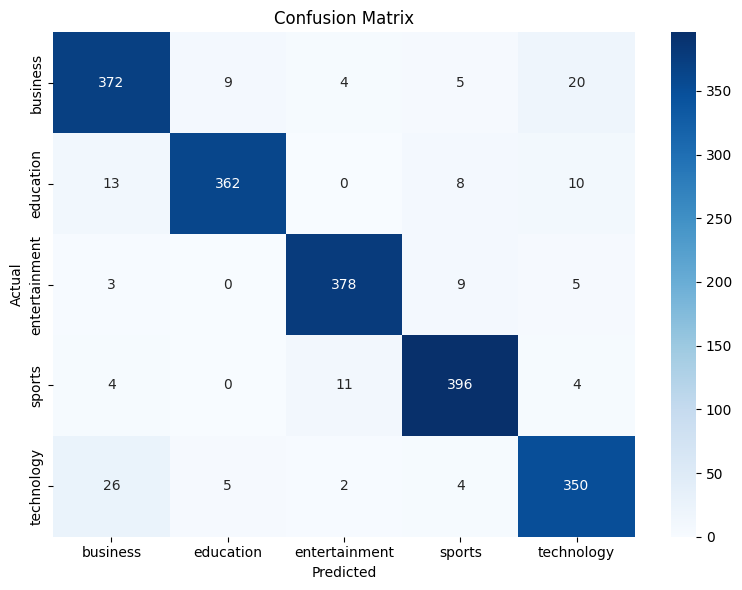

In [30]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=files.values(), yticklabels=files.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [31]:
#predict on 5 new unseen news description
new_descriptions = [
    "The company reported a significant increase in quaterly profits.",
    "A new curriculum will be introduced in all state schools.",
    "The latest movie release has broken all box office records.",
    "The football team secured a last-minute victory in the finals.",
    "Innovations in AI are changing the face of the tech industry."
]

new_X = vectorizer.transform(new_descriptions)

new_pred = model.predict(new_X)

for desc, pred in zip(new_descriptions, new_pred):
    print(f"Description: {desc} ----> Predicted Category: {pred}\n")

Description: The company reported a significant increase in quaterly profits. ----> Predicted Category: business

Description: A new curriculum will be introduced in all state schools. ----> Predicted Category: education

Description: The latest movie release has broken all box office records. ----> Predicted Category: entertainment

Description: The football team secured a last-minute victory in the finals. ----> Predicted Category: sports

Description: Innovations in AI are changing the face of the tech industry. ----> Predicted Category: technology



In [32]:
# Centroid based classificaton uing eclidean disrttnace concept

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

texts = ["I love this product1", "This is terible.", "Absolutely amazing","Not good at all"]

labels = ["positive","negative","positive","negative"]

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(texts)

class_centroids = {}
unique_label = set(labels)

for label in unique_label:

    class_indices = [i for i, lbl in enumerate(labels) if lbl == label]

    class_vectors = X[class_indices].toarray()

    class_centroids[label] = np.mean(class_vectors, axis=0)

new_text = ['This product is amazing!']

new_vector = vectorizer.transform(new_text).toarray()

distances = {
    label: euclidean_distances([centroid], new_vector)[0][0]
    for label, centroid in class_centroids.items()
}

predicted_label = min(distances, key=distances.get)

for label, centroid in class_centroids.items():

    print(f"\nCentroid for class '{label}' : \n{centroid}")

print(f"\nDistance from new text to centroids : \n{distances}")

print(f"\nPredicted label : {predicted_label}")




Centroid for class 'positive' : 
[0.35355339 0.         0.35355339 0.         0.         0.
 0.30880719 0.         0.30880719 0.         0.24346713]

Centroid for class 'negative' : 
[0.         0.25       0.         0.25       0.25       0.30880719
 0.         0.25       0.         0.30880719 0.24346713]

Distance from new text to centroids : 
{'positive': np.float64(0.9089420842914386), 'negative': np.float64(0.9388543610356126)}

Predicted label : positive


In [33]:
# Centroid based classificaton using cosine similarity

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

texts = ["I love this product1", "This is terible.", "Absolutely amazing","Not good at all"]

labels = ["positive","negative","positive","negative"]

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(texts)

class_centroids = {}
unique_label = set(labels)

for label in unique_label:

    class_indices = [i for i, lbl in enumerate(labels) if lbl == label]

    class_vectors = X[class_indices].toarray()

    class_centroids[label] = np.mean(class_vectors, axis=0)

new_text = ['This product is amazing!']

new_vector = vectorizer.transform(new_text).toarray()

similarities = {
    label: cosine_similarity([centroid], new_vector)[0][0]
    for label, centroid in class_centroids.items()
}

predicted_label = max(distances, key=distances.get)

for label, centroid in class_centroids.items():

    print(f"\nCentroid for class '{label}' : \n{centroid}")

print(f"\nCosine similarities from new text to centroids : \n{distances}")

print(f"\nPredicted label : {predicted_label}")




Centroid for class 'positive' : 
[0.35355339 0.         0.35355339 0.         0.         0.
 0.30880719 0.         0.30880719 0.         0.24346713]

Centroid for class 'negative' : 
[0.         0.25       0.         0.25       0.25       0.30880719
 0.         0.25       0.         0.30880719 0.24346713]

Cosine similarities from new text to centroids : 
{'positive': np.float64(0.9089420842914386), 'negative': np.float64(0.9388543610356126)}

Predicted label : negative


In [34]:
# Lexicon using nltk corpora

import nltk
from nltk.corpus import wordnet, framenet as fn
from nltk.corpus import propbank
from nltk.corpus.reader.verbnet import VerbnetCorpusReader

nltk.download('wordnet')
nltk.download('framenet_v17')
nltk.download('propbank')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dai.STUDENTSDC\AppData\Roaming\nltk_data...
[nltk_data] Downloading package framenet_v17 to
[nltk_data]     C:\Users\dai.STUDENTSDC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\framenet_v17.zip.
[nltk_data] Downloading package propbank to
[nltk_data]     C:\Users\dai.STUDENTSDC\AppData\Roaming\nltk_data...


True

In [35]:
print("Wordnet example : ")

synonyms = wordnet.synsets('happy')

print("Synonyms  : ", [lemma.name() for synset in synonyms for lemma in synset.lemmas()])

Wordnet example : 
Synonyms  :  ['happy', 'felicitous', 'happy', 'glad', 'happy', 'happy', 'well-chosen']


In [36]:
antonyms = []

for syn in wordnet.synsets('happy'):

    for lemma in syn.lemmas():

        if lemma.antonyms():

            antonyms.append(lemma.antonyms()[0].name())

print("Antonyms : ", antonyms)

Antonyms :  ['unhappy']


In [37]:
# Framenet :Retriving Frames for "happy"

print("\nFrameNet Examples : ")

frames = fn.frames_by_lemma("happy")

if frames:

    for frame in frames[:3]:

        print(f"Frame Name: {frame.name}")

        print(f"Frame Definition: {frame.definition}")

else:

    print("No frames found for 'happy'")


FrameNet Examples : 
Frame Name: Emotion_directed
Frame Definition: The adjectives and nouns in this frame describe an Experiencer who is feeling or experiencing a particular emotional response to a Stimulus or about a Topic.  There can also be a Circumstances under which the response occurs or a Reason that the Stimulus evokes the particular response in the Experiencer.  'Mr. Whiskers is upset that there are no more cat treats.' 'The furious parent stormed into the office.' 'Franz gets infuriated at the thought of his ex-wife remarried.' ' She flashed a jubilant smile.' 
Frame Name: Luck
Frame Definition: A State_of_affairs is evaluated as good (or bad), against a background assumption that previously, the State_of_affairs was thought to be unlikely to occur. The State_of_affairs holds for a particular Protagonist.  'He is a lucky gambler.'


In [38]:
# PropBank: Rolesets : Result in XML , need to parse it

print("\nPropBank Examples : ")

try:

    rolesets = propbank.rolesets()

    for roleset in rolesets[:3]:

        roleset_id = roleset.attrib.get('id','N/A')

        print(f"Roleset ID : {roleset_id}")

        roles = roleset.findall('roles/role')

        for role in roles:

            n = role.attrib.get('n','?')

            dscr = role.attrib.get('dscr','')

            print(f" Arg{n} : {dscr}")

    if propbank.instances():

        print("\nFiltering instances of specific verb.....")

        target_verb = "run"

        instances = propbank.instances()

        filtered = [inst for inst in instances if inst.roleset.startswith(f"{target_verb}.")]

        print(f"\nFound {len(filtered)} instances for verb '{target_verb}'")

        for inst in filtered[:2]:

            print(f"Sentence ID : {inst.fileid}, Roleset : {inst.roleset}")

except Exception as e:

    print(f"An error occurred :")


PropBank Examples : 
Roleset ID : abandon.01
 Arg0 : 
 Arg1 : 
 Arg2 : 
Roleset ID : abandon.02
 Arg0 : 
 Arg1 : 
 Arg2 : 
Roleset ID : abandon.03
 Arg0 : 
 Arg1 : 
 Arg2 : 

Filtering instances of specific verb.....

Found 374 instances for verb 'run'
Sentence ID : wsj_0027.mrg, Roleset : run.01
Sentence ID : wsj_0034.mrg, Roleset : run.05


In [39]:
!pip install pyspellchecker

In [47]:
!pip install spellchecker

In [49]:
from spellchecker import SpellChecker
import nltk
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4')

spell = SpellChecker()

words = ['speling','correct','misteak']

misspelled = spell.unknown(words)

print("Spell Check Correction : ")

for word in misspelled:

    print(f" - Original : {word}")
    print(f"   Best Suggestion : {spell.correction(word)}")
    print(f"   Other candidates : {spell.candidates(word)}")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dai.STUDENTSDC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dai.STUDENTSDC\AppData\Roaming\nltk_data...


Spell Check Correction : 
 - Original : misteak
   Best Suggestion : mistake
   Other candidates : {'mister', 'misters', 'mistreat', 'mishear', 'steak', 'misdeal', 'mislead', 'misread', 'misspeak', 'mistral', 'misted', 'mistook', 'misteach', 'mistake'}
 - Original : speling
   Best Suggestion : spelling
   Other candidates : {'spelling', 'spewing', 'spieling', 'seeling'}


In [50]:
# Example sentence of a word

word ="happy"

synonyms = wordnet.synsets(word)

print("\nExample sentence : ")

for example in synonyms[0].examples():

    print(f" - {example}")


Example sentence : 
 - a happy smile
 - spent many happy days on the beach
 - a happy marriage


In [51]:
!pip install indic-transliteration

  Using cached click-8.1.8-py3-none-any.whl (98 kB)
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\click-7.1.2.dist-info\\INSTALLER'
Consider using the `--user` option or check the permissions.



In [53]:
# Transliteration

from indic_transliteration import sanscript

from indic_transliteration.sanscript import transliterate

texts = {

    "Hindi": "नमस्ते दुनिया",

    "Bengali": "নমস্কার বিশ্ব",

    "Tamil": "வணக்கம் உலகம்",

    "Telugu": "నమస్తే ప్రపంచం",

    "Marathi": "नमस्कार जगा",

    "Kannada": "ನಮಸ್ಕಾರ ಜಗತ್ತು"
}

# Map language name to the correct script constant in sanscript

lang_to_script = {

    "Hindi": sanscript.DEVANAGARI,

    "Bengali": sanscript.BENGALI,

    "Tamil": sanscript.TAMIL,

    "Telugu": sanscript.TELUGU,

    "Marathi": sanscript.DEVANAGARI,

    "Kannada": sanscript.KANNADA
}

for lang, text in texts.items():

    src_scripts = lang_to_script[lang]

    itrans = transliterate(text, src_scripts, sanscript.ITRANS)

    iast = transliterate(text, src_scripts, sanscript.IAST)

    print(f" {lang} : {text}")
    print(f" ITRANS : {itrans}")
    print(f" IAST : {iast}")
    print()

 Hindi : नमस्ते दुनिया
 ITRANS : namaste duniyA
 IAST : namaste duniyā

 Bengali : নমস্কার বিশ্ব
 ITRANS : namaskAra vishva
 IAST : namaskāra viśva

 Tamil : வணக்கம் உலகம்
 ITRANS : vaNaghghaM ulaghaM
 IAST : vaṇaghghaṃ ulaghaṃ

 Telugu : నమస్తే ప్రపంచం
 ITRANS : namaste prapaMchaM
 IAST : namaste prapaṃcaṃ

 Marathi : नमस्कार जगा
 ITRANS : namaskAra jagA
 IAST : namaskāra jagā

 Kannada : ನಮಸ್ಕಾರ ಜಗತ್ತು
 ITRANS : namaskAra jagattu
 IAST : namaskāra jagattu



In [54]:
!pip install language_tool_python

In [55]:
!sudo apt update
!sudo apt install openjdk-17-jdk -y
!java -version

Sudo is disabled on this machine. To enable it, go to the ]8;;ms-settings:developers\Developer Settings page]8;;\ in the Settings app
Sudo is disabled on this machine. To enable it, go to the ]8;;ms-settings:developers\Developer Settings page]8;;\ in the Settings app
java version "23.0.2" 2025-01-21
Java(TM) SE Runtime Environment (build 23.0.2+7-58)
Java HotSpot(TM) 64-Bit Server VM (build 23.0.2+7-58, mixed mode, sharing)


In [57]:
# Grammar Check

import language_tool_python

tool = language_tool_python.LanguageTool("en")

text = "I come to C-DAC everyday."

matches = tool.check(text)

for match in matches:

    print(f"Issue : {match.message}")
    print(f"Suggested correction : {match.replacements}")

Unzipping C:\Users\DAI~1.STU\AppData\Local\Temp\tmp10q0a3b4.zip to C:\Users\dai.STUDENTSDC\.cache\language_tool_python.
Downloaded https://internal1.languagetool.org/snapshots/LanguageTool-latest-snapshot.zip to C:\Users\dai.STUDENTSDC\.cache\language_tool_python.


Issue : ‘Everyday’ is an adjective. Did you mean “every day”?
Suggested correction : ['every day']


In [58]:
!pip install transformers torch

In [59]:
# Text auto completion

from transformers import pipeline

generator = pipeline("text-generation", model = "gpt2")

def autocomplete(prompt, max_length = 50):

    result = generator(prompt, max_length = max_length, num_return_sequences = 1, temperature=0.7, top_k = 50, pad_token_id = 50256)

    print(result)

    return result[0]['generated_text']


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

From c:\Users\dai.STUDENTSDC\.conda\envs\NLP\Lib\site-packages\tf_keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [60]:
prompt = "The difference between human inteligence and AI"

print("Auto complete : ", autocomplete(prompt))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'The difference between human inteligence and AI is often misunderstood. Some researchers have argued that human intelligence is inherently biased, and therefore not capable of acting independently. Others argued that human intelligence is capable of acting independently, and thus capable of using the information gleaned from computers to build more efficient and efficient intelligence systems. The evidence for the latter contention is overwhelming. In recent years, there has been a surge in the number of papers and papers about AI (and AI programs) that describe the difficulties of human intelligence. In this article, we present a few short articles from the past decade that challenge the belief that human intelligence is capable of acting independently, and what they suggest about the extent to which AI is capable of being used to build better and more efficient systems.\n\nThe difficulties of a human intelligence\n\nThe first major problem with human intelligence

In [61]:
prompt = "Machine learning is "

print("Auto complete : ", autocomplete(prompt))

Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'Machine learning is \xa0a way of understanding how to develop and use machine learning algorithms and how to build a better, more accurate understanding of what you are learning.\nMachine learning is not only a way of understanding how to develop and use machine learning algorithms and how to build a better, more accurate understanding of what you are learning, but it is also a way to understand how to develop and use machine learning algorithms, building on existing knowledge.\nThe problem is that machine learning algorithms may be very difficult to learn and understand, and the problem is that machine learning algorithms may be very difficult to understand and understand, because they are in fact incredibly complicated.\nThe problem is that machine learning algorithms may be very difficult to learn and understand, and the problem is that machine learning algorithms may be very difficult to understand and understand, because they are in fact incredibly complicated

In [62]:
prompt = " The future of AI is "

print("Auto complete : ", autocomplete(prompt))

Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': ' The future of AI is \xa0to solve problems in a more efficient manner than human beings.\n"We are a species that can be programmed to respond to problems and solve them, but it is not the same as humans. For example, humans have been doing this for centuries, but we have not had the patience to learn from it. We can only learn from mistakes that we can use to solve problems. And when it comes to understanding and solving problems, we are not a species, we are the human species. That\'s where the human approach is coming from. We are the human species because of the choices we make. We can choose to live our lives in a better way, but the consequences are greater. We are the human species because we can choose to have better lives. We are the human species because of the choices we make.\n"We can choose to have better lives, but the consequences are greater. We are the human species because of the choices we make. We are the human species because we have greater sel

In [63]:
# domain identification

classifier = pipeline("zero-shot-classification", model = "facebook/bart-large-mnli")

text = "The new AI model surpasses human performance in language understanding."

candidate_labels = ["technology","sports", "finance","health","education"]

result = classifier(text, candidate_labels)

print(f"Predicted domain: {result['labels'][0]} (Confidence : {result['scores'][0]})")

config.json: 0.00B [00:00, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


Predicted domain: technology (Confidence : 0.9874113202095032)


In [64]:
text = "I was feeling a bit lonely yesterday."

candidate_labels = ["psychology","medicine", "pharma","personal","family"]

result = classifier(text, candidate_labels)

print("Top 3 predicted domain : ")

for label, score in zip(result['labels'][:3], result['scores'][:3]):

    print(f"{label} (Confidence : {score})")

Top 3 predicted domain : 
personal (Confidence : 0.9429901838302612)
psychology (Confidence : 0.03370288014411926)
medicine (Confidence : 0.00874606054276228)


In [65]:
labels = ["male","female"]

texts = [
    "I love footbal and gaming.",
    "I enjoy shpping and fasgion.",
    "I work in the field of AI.",
    "I am a collage student.",
    "I am an AI trainer.",
    "I am a smartphone addict."
]

for text in texts:

    result = classifier(text, candidate_labels=labels)

    print(f"Text : {text} \nPredicted gender : {result['labels'][0]} (Confidence : {result['scores'][0]}\n")

Text : I love footbal and gaming. 
Predicted gender : male (Confidence : 0.7647196650505066

Text : I enjoy shpping and fasgion. 
Predicted gender : female (Confidence : 0.5809084177017212

Text : I work in the field of AI. 
Predicted gender : female (Confidence : 0.7784162759780884

Text : I am a collage student. 
Predicted gender : female (Confidence : 0.5977951288223267

Text : I am an AI trainer. 
Predicted gender : female (Confidence : 0.7123528718948364

Text : I am a smartphone addict. 
Predicted gender : male (Confidence : 0.8212590217590332

